In [3]:
import pandas as pd
import os

TITANIC_PATH = os.path.join("datasets", "titanic")
def load_titanic_data(filename, titanic_path=TITANIC_PATH):
    csv_path = os.path.join(titanic_path, filename)
    return pd.read_csv(csv_path)

In [83]:
train_data = load_titanic_data("train.csv")
test_data = load_titanic_data("test.csv")
train_data = train_data.set_index("PassengerId")
test_data = test_data.set_index("PassengerId")

In [26]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Age column has null values which can be dealt with in various ways, one way can be replacing them with the median.

PassengerId can be used as the index.

Name, Ticket, Cabin can be ignored.

In [24]:
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [25]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [27]:
train_data["Survived"].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

In [28]:
train_data["Pclass"].value_counts()

Pclass
3    491
1    216
2    184
Name: count, dtype: int64

In [29]:
train_data["Sex"].value_counts()

Sex
male      577
female    314
Name: count, dtype: int64

In [31]:
# Embarked attribute tells us where the passenger embarked: C=Cherbourg, Q=Queenstown, S=Southampton.
train_data["Embarked"].value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

In [32]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
        ("imputer", SimpleImputer(strategy="median")),
        ("scaler", StandardScaler())
    ])

In [34]:
from sklearn.preprocessing import OneHotEncoder

cat_pipeline = Pipeline([
        ("imputer", SimpleImputer(strategy="most_frequent")),
        ("cat_encoder", OneHotEncoder(sparsed_output=False)),
    ])

In [35]:
from sklearn.compose import ColumnTransformer

num_attribs = ["Age", "SibSp", "Parch", "Fare"]
cat_attribs = ["Pclass", "Sex", "Embarked"]

preprocess_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_attribs),
        ("cat", cat_pipeline, cat_attribs),
    ])

In [36]:
X_train = preprocess_pipeline.fit_transform(
    train_data[num_attribs + cat_attribs])
X_train

/Users/rohitgundakalli/Library/Python/3.9/lib/python/site-packages/sklearn/preprocessing/_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


array([[-0.56573646,  0.43279337, -0.47367361, ...,  0.        ,
         0.        ,  1.        ],
       [ 0.66386103,  0.43279337, -0.47367361, ...,  1.        ,
         0.        ,  0.        ],
       [-0.25833709, -0.4745452 , -0.47367361, ...,  0.        ,
         0.        ,  1.        ],
       ...,
       [-0.1046374 ,  0.43279337,  2.00893337, ...,  0.        ,
         0.        ,  1.        ],
       [-0.25833709, -0.4745452 , -0.47367361, ...,  1.        ,
         0.        ,  0.        ],
       [ 0.20276197, -0.4745452 , -0.47367361, ...,  0.        ,
         1.        ,  0.        ]])

In [37]:
y_train = train_data["Survived"]

In [38]:
from sklearn.ensemble import RandomForestClassifier

forest_clf = RandomForestClassifier(n_estimators=100, random_state=42)
forest_clf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [39]:
X_test = preprocess_pipeline.transform(test_data[num_attribs + cat_attribs])
y_pred = forest_clf.predict(X_test)

In [40]:
from sklearn.model_selection import cross_val_score

forest_scores = cross_val_score(forest_clf, X_train, y_train, cv=10)
forest_scores.mean()

0.8092759051186016

In [41]:
from sklearn.svm import SVC

svm_clf = SVC(gamma="auto")
svm_scores = cross_val_score(svm_clf, X_train, y_train, cv=10)
svm_scores.mean()

0.8249313358302123

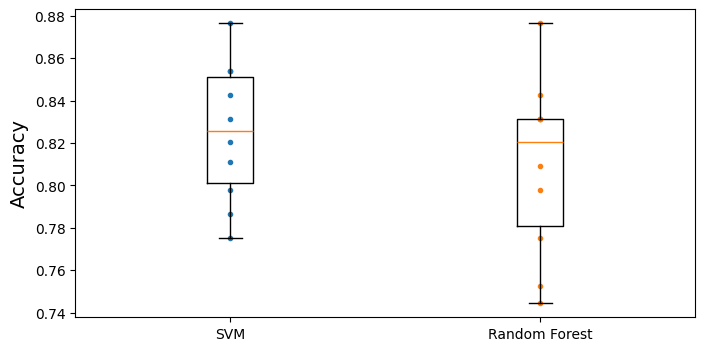

In [42]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 4))
plt.plot([1]*10, svm_scores, ".")
plt.plot([2]*10, forest_scores, ".")
plt.boxplot([svm_scores, forest_scores], labels=("SVM","Random Forest"))
plt.ylabel("Accuracy", fontsize=14)
plt.show()

SVM model has better average and lesser variance. Hence SVM is a better choices.

In [45]:
svm_clf = SVC(gamma="auto")
svm_clf.fit(X_train, y_train)

SVC(gamma='auto')

In [46]:
y_pred = svm_clf.predict(X_test)

In [63]:
final_sub = test_data[["PassengerId"]].copy()
final_sub = final_sub.set_index("PassengerId")
final_sub['Survived'] = y_pred
final_sub.to_csv('Final_Submission.csv')

This submission got a score of 0.78. In order to make this better, we will try out different things such as converting numerical attributes to categorical attributes. 

In [93]:
train_data["AgeBucket"] = train_data["Age"] // 15 * 15
train_data[["AgeBucket", "Survived"]].groupby(['AgeBucket']).mean()

,Survived
AgeBucket,
0.0,0.576923
15.0,0.362745
30.0,0.423256
45.0,0.404494
60.0,0.240000
75.0,1.000000


In [94]:
train_data["RelativesOnboard"] = train_data["SibSp"] + train_data["Parch"]
train_data[["RelativesOnboard", "Survived"]].groupby(['RelativesOnboard']).mean()
train_data['Cabin'] = train_data['Cabin'].str[0]

In [99]:
num_attribs_new = ["Fare"]
cat_attribs_new = ["AgeBucket", "RelativesOnboard", "Pclass", "Sex", "Embarked"]#, "Cabin"]

preprocess_pipeline_new = ColumnTransformer([
        ("num", num_pipeline, num_attribs_new),
        ("cat", cat_pipeline, cat_attribs_new),
    ])

In [100]:
X_train_mod = preprocess_pipeline_new.fit_transform(
    train_data[num_attribs_new + cat_attribs_new])
X_train_mod

/Users/rohitgundakalli/Library/Python/3.9/lib/python/site-packages/sklearn/preprocessing/_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


array([[-0.50244517,  0.        ,  1.        , ...,  0.        ,
         0.        ,  1.        ],
       [ 0.78684529,  0.        ,  0.        , ...,  1.        ,
         0.        ,  0.        ],
       [-0.48885426,  0.        ,  1.        , ...,  0.        ,
         0.        ,  1.        ],
       ...,
       [-0.17626324,  0.        ,  1.        , ...,  0.        ,
         0.        ,  1.        ],
       [-0.04438104,  0.        ,  1.        , ...,  1.        ,
         0.        ,  0.        ],
       [-0.49237783,  0.        ,  0.        , ...,  0.        ,
         1.        ,  0.        ]])

In [101]:
test_data["AgeBucket"] = test_data["Age"] // 15 * 15
test_data["RelativesOnboard"] = test_data["SibSp"] + test_data["Parch"]
# test_data['Cabin'] = test_data['Cabin'].str[0]
X_test_mod = preprocess_pipeline_new.transform(test_data[num_attribs_new + cat_attribs_new])

In [102]:
svm_clf = SVC(gamma="auto")
svm_scores = cross_val_score(svm_clf, X_train_mod, y_train, cv=10)
svm_scores.mean()

0.7923595505617977

In [89]:
train_data["Cabin"].value_counts()

Cabin
B96 B98        4
G6             4
C23 C25 C27    4
C22 C26        3
F33            3
              ..
E34            1
C7             1
C54            1
E36            1
C148           1
Name: count, Length: 147, dtype: int64